<a href="https://colab.research.google.com/github/bahl-lab-konstanz/animal_physiology_class/blob/main/animal_physiology_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import imageio
import numpy as np
from pathlib import Path
import pylab as pl
from scipy.stats import mode
from google.colab import files
from IPython.display import HTML
from base64 import b64encode

kjkjk

In [ ]:
uploaded = files.upload()

Saving Basler acA2040-90um (22778061)_20201106_171319879_size_reduced.mp4 to Basler acA2040-90um (22778061)_20201106_171319879_size_reduced.mp4


In [ ]:
for name in uploaded:
  pass

mp4 = open(name,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video width=400 controls><source src="%s" type="video/mp4"></video>""" % data_url)

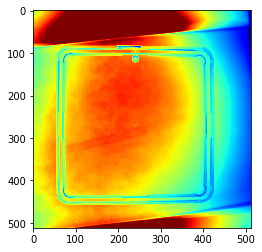

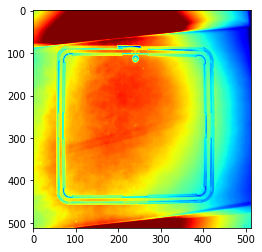

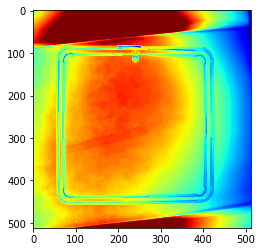

In [ ]:
vid = imageio.get_reader(name,  'ffmpeg')
input_fps = vid.get_meta_data()['fps']
all_frames = []
for i, frame in enumerate(vid):
    if i%100 == 0:
        all_frames.append(frame[:, :, 0])

mode_background, count = mode(all_frames, axis=0)
mode_background = mode_background[0]

pl.imshow(mode_background, cmap='jet')
pl.show()

mean_background = np.mean(all_frames, axis=0)

pl.imshow(mean_background, cmap='jet')
pl.show()

median_background = np.median(all_frames, axis=0)

pl.imshow(median_background, cmap='jet')
pl.show()

imageio.imwrite("background.tiff", mean_background)



In [ ]:
writer = imageio.get_writer("background_subtracted.mp4", fps=input_fps, ffmpeg_params=["-b:v", "4M"])
background = imageio.imread("background.tiff")

for i, frame in enumerate(vid):

    background_subtracted = background.astype(np.int) - frame[:, :, 0].astype(np.int)

    idx = background_subtracted > 20
    background_subtracted[idx] = 255
    background_subtracted[~idx] = 0

    writer.append_data(background_subtracted.astype(np.uint8))

writer.close()

In [ ]:
mp4 = open('background_subtracted.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video width=400 controls><source src="%s" type="video/mp4"></video>""" % data_url)

(901, 3)


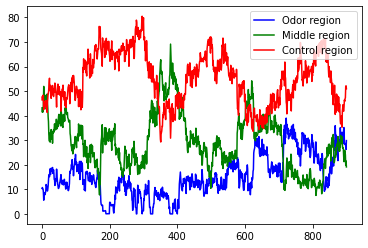

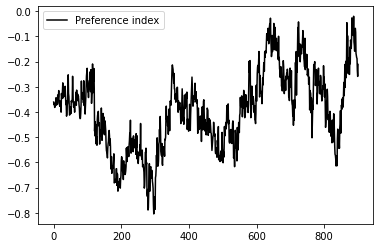

In [ ]:
vid = imageio.get_reader('background_subtracted.mp4',  'ffmpeg')

sums = []
for i, frame in enumerate(vid):
    sum_region1 = frame[0:170,:,0].sum()
    sum_region2 = frame[170:340,:,0].sum()
    sum_region3 = frame[340:510,:,0].sum()

    sums.append([sum_region1, sum_region2, sum_region3])

sums = np.array(sums).astype(np.int)
print(sums.shape)

all_pixels = sums.sum(axis=1)
pl.plot(100 * sums[:,0] / all_pixels, color='blue', label="Odor region") # duft
pl.plot(100 * sums[:,1] / all_pixels, color='green', label="Middle region") # mitte
pl.plot(100 * sums[:,2] / all_pixels, color='red', label="Control region") # unten
pl.legend()
pl.figure()

pl.plot((sums[:,0] - sums[:,2]) / all_pixels, color='black', label="Preference index") # unten
pl.legend()
pl.show()
